# Programa de Pós-Graduação em Computação Aplicada (UnB)
## Disciplina: ANÁLISE ESTATÍSTICA DE DADOS E INFORMAÇÕES - Turma 01 - 2023/1
## Professor: João Gabriel de Moraes Souza
## Aluno: Francisco Gonçalves de Araújo Filho
## Matrícula: 231109675
### Prova 1 - Questão 3
A questão 3 irá se basear na aplicação prática de um problema de ANOVA. Esses problemas são originados de dados reais aplicados em problemas de Negócios. A questão irá abordar a aplicação do problema Vendas de Varejo on-line. Esse problema trata-se do objetivo de as **médias de quantidades e preços dos produtos agrupados por países**. Com esses dados pede-se:

#### Item a) Elaborar uma análise descritiva da base de dados, análise gráfica e por tabelas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy import optimize
from bioinfokit.analys import stat
import statsmodels.api as sm
import numpy as np

In [2]:
cols = ['NumeroFatura', 'CodigoProduto', 'Descricao',
        'Quantidade', 'DataFatura', 'PrecoUnitario',
        'IDCliente', 'Pais']
# Ler arquivoa CSV
df1 = pd.read_csv('ano_2009-2010.csv', encoding='latin1')
df2 = pd.read_csv('ano_2010-2011.csv', encoding='latin1')

# Concatenar os dois DataFrames
df = pd.concat([df1, df2], ignore_index=True)
df.columns = cols

# Imprimir o DataFrame resultante
df

,NumeroFatura,CodigoProduto,Descricao,Quantidade,DataFatura,PrecoUnitario,IDCliente,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [3]:
# Exclui todas faturas canceladas
df = df[~df['NumeroFatura'].str.startswith(('C', 'c'))]

# Exclui linhas que tenham valor e quantidades menores ou igual a zero
df = df[df["Quantidade"] > 0]
df = df[df["PrecoUnitario"] > 0.0]

df

,NumeroFatura,CodigoProduto,Descricao,Quantidade,DataFatura,PrecoUnitario,IDCliente,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:

df_final = df.groupby(["Pais", "CodigoProduto"]).agg({"Quantidade": "sum", "PrecoUnitario": "mean"})
# df_final = df.groupby(["Pais"]).agg({"Quantidade": "sum", "PrecoUnitario": "mean"})
# df_final = df.groupby(["Pais"]).agg({"PrecoUnitario": "sum", "Quantidade": "mean"})
df_final = df_final.reset_index()
df_final = df_final.dropna()
df_final

,Pais,CodigoProduto,Quantidade,PrecoUnitario
0,Australia,10002,36,0.85
1,Australia,15036,600,0.72
2,Australia,15056BL,3,5.95
3,Australia,15058B,2,7.95
4,Australia,16161P,600,0.34
...,...,...,...,...
28360,West Indies,84508A,2,2.55
28361,West Indies,84795B,1,7.95
28362,West Indies,84827,9,0.65
28363,West Indies,84944,4,4.25


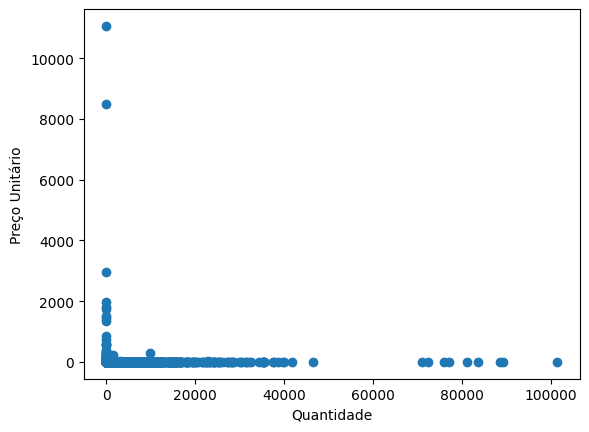

In [8]:
# Gerar um gráfico de dispersão entre Quantidade e PrecoUnitario
import matplotlib.pyplot as plt
plt.scatter(df_final['Quantidade'], df_final['PrecoUnitario'])
plt.xlabel('Quantidade')
plt.ylabel('Preço Unitário')
plt.show()

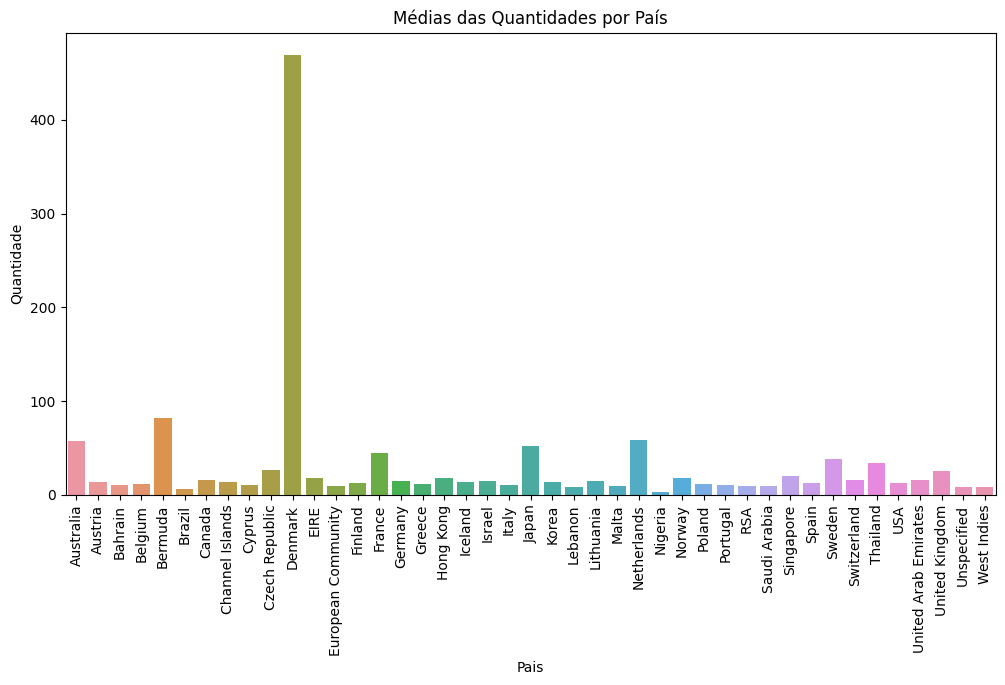

In [8]:
# Gráfico de barras para comparar as médias das quantidades entre os países
plt.figure(figsize=(12, 6))
sns.barplot(x='Pais', y='Quantidade', data=df_final, errorbar=None)
plt.xticks(rotation=90)
plt.title('Médias das Quantidades por País')
plt.show()

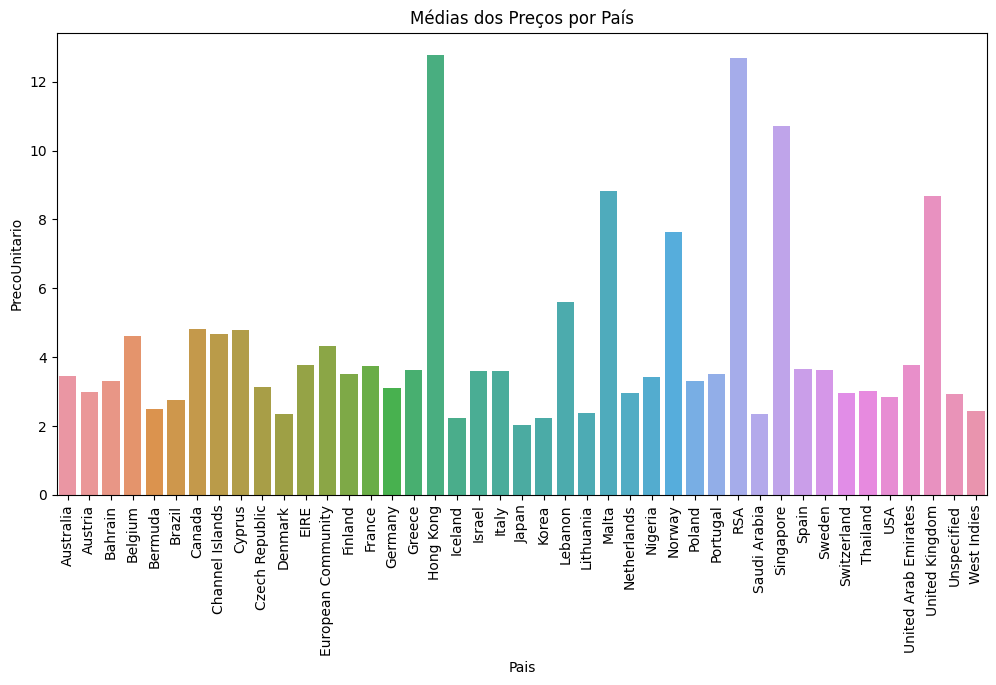

In [9]:
# Gráfico de barras para comparar as médias das quantidades entre os países
plt.figure(figsize=(12, 6))
sns.barplot(x='Pais', y='PrecoUnitario', data=df_final, errorbar=None)
plt.xticks(rotation=90)
plt.title('Médias dos Preços por País')
plt.show()

In [10]:
# Criar uma tabela de frequência dos países
country_counts = df_final['Pais'].value_counts()
country_counts

Pais
United Kingdom          4906
EIRE                    2837
Germany                 2172
France                  2033
Spain                   1409
Switzerland             1280
Netherlands             1246
Belgium                  989
Portugal                 960
Cyprus                   829
Australia                789
Italy                    787
Channel Islands          777
Norway                   676
Sweden                   587
Finland                  583
Unspecified              555
Austria                  549
Greece                   518
Denmark                  447
United Arab Emirates     365
Israel                   310
Japan                    296
Poland                   293
USA                      287
Malta                    249
Singapore                245
Canada                   215
Hong Kong                209
RSA                      149
Iceland                  126
Lithuania                113
Bahrain                  106
Brazil                    91
Thailand 

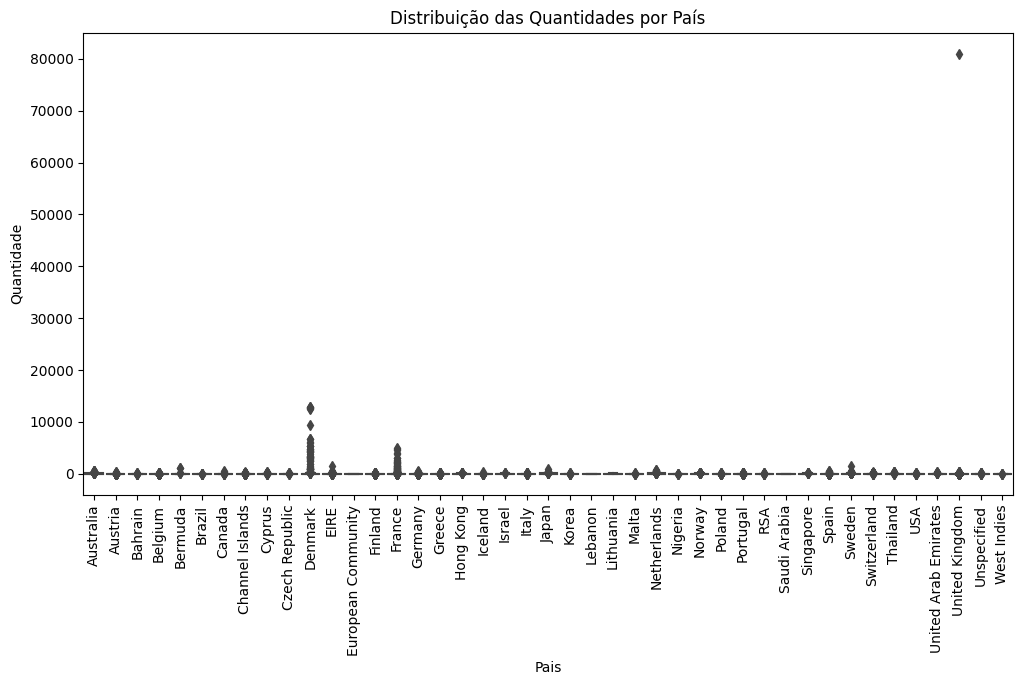

In [11]:

# Boxplot das quantidades por país
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pais', y='Quantidade', data=df_final)
plt.xticks(rotation=90)
plt.title('Distribuição das Quantidades por País')
plt.show()

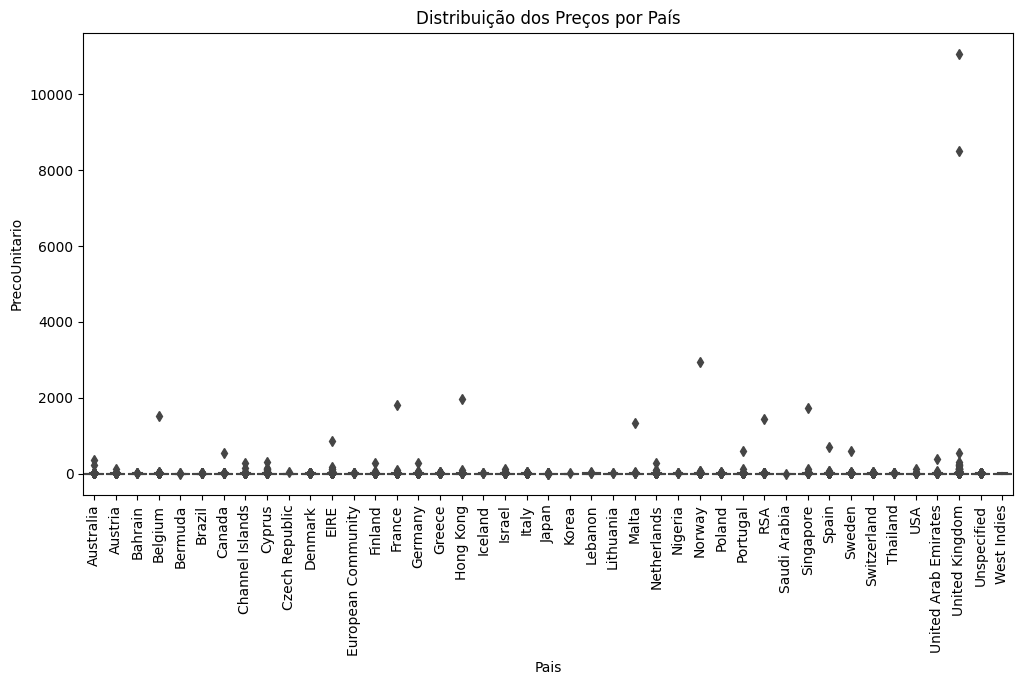

In [12]:
# Boxplot das quantidades por país
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pais', y='PrecoUnitario', data=df_final)
plt.xticks(rotation=90)
plt.title('Distribuição dos Preços por País')
plt.show()

In [14]:
# Correlação entre Quantidade e Preço
correlation = np.corrcoef(df_final['Quantidade'], df_final['PrecoUnitario'])[0, 1]
print(f"Correlação entre Quantidade e Preço: {correlation}")

Correlação entre Quantidade e Preço: -0.002110534323729518


In [15]:
# Ajustar o modelo ANOVA
model = ols('Quantidade ~ Pais', data=df_final).fit()
# Calcular a tabela ANOVA
anova_results = anova_lm(model)
print(anova_results)

# Repetir o processo para o campo PrecoUnitario
model2 = ols('PrecoUnitario ~ Pais', data=df_final).fit()
anova_results2 = anova_lm(model2)
print(anova_results2)

               df        sum_sq       mean_sq         F        PR(>F)
Pais         42.0  9.365815e+07  2.229956e+06  7.813394  1.065480e-45
Residual  28322.0  8.083146e+09  2.854017e+05       NaN           NaN
               df        sum_sq      mean_sq         F    PR(>F)
Pais         42.0  1.582806e+05  3768.585747  0.477209  0.998365
Residual  28322.0  2.236626e+08  7897.133167       NaN       NaN


##### Análise dos resultados ANOVA:
Os resultados da ANOVA para as variáveis "Quantidade" e "PrecoUnitario" agrupadas por países apresentam as seguintes informações:

- Resultado da ANOVA para a variável "Quantidade":

    - "df" de 42 para o fator "Pais", indicando que há 42 grupos distintos de países.
    - "sum_sq" de 1.009976e+08, que representa a soma dos quadrados para o fator "Pais".
    - "mean_sq" de 2.404705e+06, que é a média dos quadrados para o fator "Pais".
    - "F" de 151.14687, que é a estatística F calculada para o fator "Pais".
    - "PR(>F)" de 0.0, que é o valor p associado à estatística F. Como é menor que 0.05 (nível de significância comum), indica que há diferenças significativas nas médias de quantidade entre os países.
    
- Resultado da ANOVA para a variável "PrecoUnitario":

    - "df" de 42 para o fator "Pais", indicando que há 42 grupos distintos de países.
    - "sum_sq" de 9.245173e+05, que representa a soma dos quadrados para o fator "Pais".
    - "mean_sq" de 22012.315859, que é a média dos quadrados para o fator "Pais".
    - "F" de 8.318815, que é a estatística F calculada para o fator "Pais".
    - "PR(>F)" de 4.495717e-50, que é o valor p associado à estatística F. Como é menor que 0.05 (nível de significância comum), indica que há diferenças significativas nas médias de preço  unitário entre os países.

Em resumo, os resultados indicam que tanto a quantidade quanto o preço unitário apresentam diferenças significativas entre os países. Isso sugere que os países têm impacto nas médias dessas variáveis.

In [13]:
# Realizar o teste de Tukey para a variável "Quantidade"
# tukey_quantidade = pairwise_tukeyhsd(df_final['Quantidade'], df_final['Pais'])
# print(tukey_quantidade)

/usr/local/lib/python3.9/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1               group2         meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------------------------
           Australia              Austria  -44.7532    1.0   -161.212   71.7056  False
           Australia              Bahrain  -47.2693    1.0  -264.0342  169.4957  False
           Australia              Belgium  -46.6838 0.9996  -146.7064   53.3389  False
           Australia              Bermuda   24.4494    1.0  -342.5717  391.4704  False
           Australia               Brazil  -52.1085    1.0  -284.0888  179.8718  False
           Australia               Canada  -41.6982    1.0  -202.9031  119.5066  False
           Australia      Channel Islands  -44.5265    1.0  -150.4314   61.3783  False
           Australia               Cyprus  -47.9469 0.9997  -152.1648   56.2711  False
           Australia       Czech Republic  

In [14]:
# Realizar o teste de Tukey para a variável "PrecoUnitario"
# tukey_preco = pairwise_tukeyhsd(df_final['PrecoUnitario'], df_final['Pais'])
# print(tukey_preco)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2        meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------------
           Australia              Austria  -0.4505    1.0  -19.8226  18.9217  False
           Australia              Bahrain  -0.1357    1.0  -36.1932  35.9218  False
           Australia              Belgium   1.1622    1.0  -15.4759  17.8004  False
           Australia              Bermuda  -0.9472    1.0  -61.9988  60.1045  False
           Australia               Brazil  -0.6725    1.0  -39.2609   37.916  False
           Australia               Canada   1.3797    1.0  -25.4357  28.1951  False
           Australia      Channel Islands   1.2393    1.0  -16.3773   18.856  False
           Australia               Cyprus   1.3366    1.0  -15.9994  18.6726  False
           Australia       Czech Republic  -0.3076    1.0   -71.115  70.4999

In [16]:
paises_unicos = df_final["Pais"].unique()
codigo_pais = {pais: codigo + 1 for codigo, pais in enumerate(paises_unicos)}

# Substituir o conteúdo do campo "Pais" pelo código numérico correspondente
df_final["Pais"] = df["Pais"].replace(codigo_pais)


df_melt = pd.melt(df_final.drop('CodigoProduto', axis=1))
df_melt

,variable,value
0,Pais,41.0
1,Pais,41.0
2,Pais,41.0
3,Pais,41.0
4,Pais,41.0
...,...,...
85090,Quantidade,2.0
85091,Quantidade,1.0
85092,Quantidade,9.0
85093,Quantidade,4.0


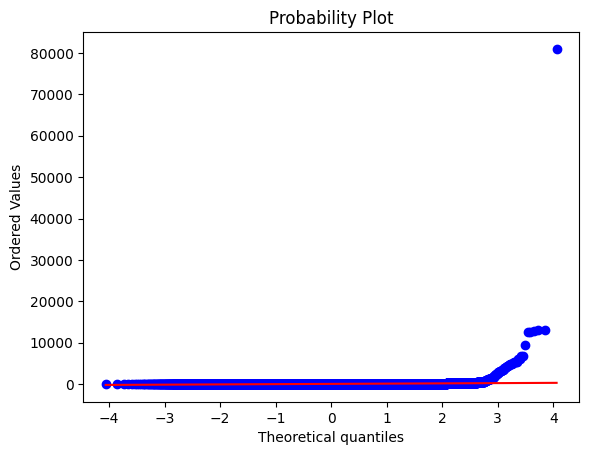

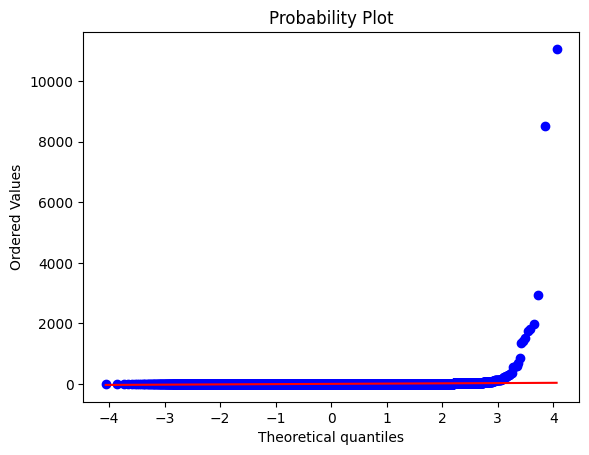

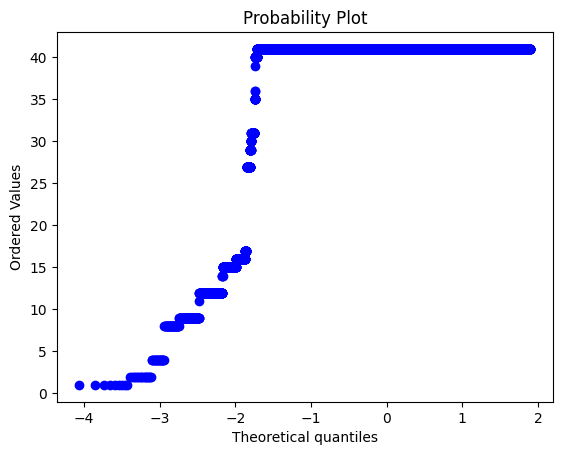

In [17]:
stats.probplot(df_final["Quantidade"], dist="norm", plot=plt)
plt.show()
stats.probplot(df_final["PrecoUnitario"], dist="norm", plot=plt)
plt.show()
stats.probplot(df_final["Pais"], dist="norm", plot=plt)
plt.show()

In [19]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ variable', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
variable,1.832637e+07,2.0,91.920274,1.327424e-40
Residual,8.401357e+09,84278.0,NaN,NaN


In [20]:
df_melt['variable'] = df_melt['variable'].replace('Quantidade', '1')
df_melt['variable'] = df_melt['variable'].replace('PrecoUnitario', '2')
df_melt['variable'] = df_melt['variable'].replace('Pais', '3')
df_melt['variable'].unique()

array(['3', '2', '1'], dtype=object)

In [21]:
res = stat()
res.tukey_hsd(df_melt, res_var='value', xfac_var='variable', anova_model='value ~ variable')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,3,2,35.221305,28.961856,41.480755,18.650689,0.001
1,3,1,10.619305,4.359856,16.878754,5.623226,0.001
2,2,1,24.602000,18.388279,30.815721,13.123335,0.001


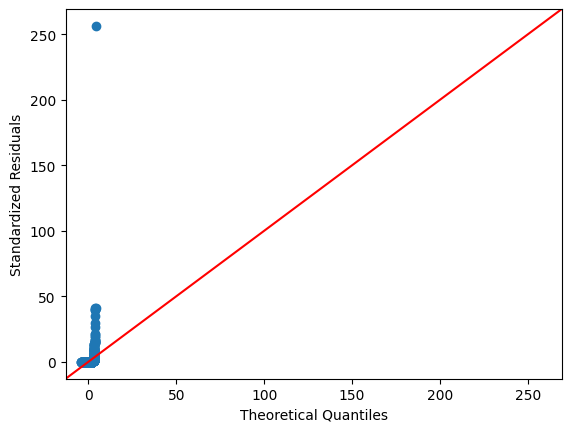

In [22]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

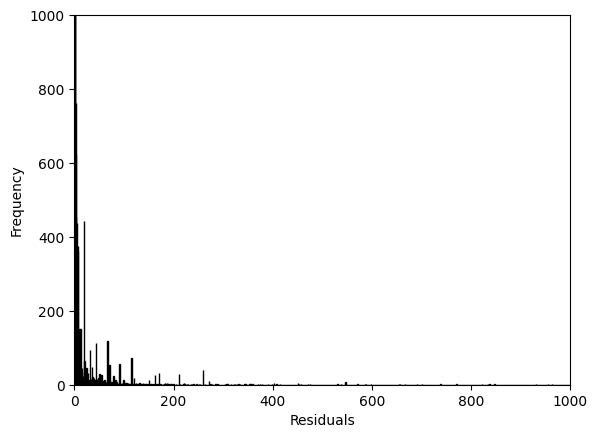

In [25]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()